<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [0]:
df_l = ["make", "body", "engType", "drive"]
for x in df_l:
  d = pd.get_dummies(df[x])
  for v in d:
    df["{}:{}".format(x,v)] = d[v]
  df = df.drop(columns=[x])

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df[[x for x in df if x != "price"]].values
y = df["price"].values.reshape(-1,1)

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [7]:
print("{:30s}: {:16.4f}".format("Intercept", float(model.intercept_)))
for i in range(len(model.coef_[0])):
  print("{:30s}: {:16.4f}".format("Coefficient({})".format([x for x in df if x != "price"][i]), float(model.coef_[0][i])))

Intercept                     :    -1382414.2032
Coefficient(mileage)          :         -57.1429
Coefficient(engV)             :         129.3548
Coefficient(registration)     :        7399.2199
Coefficient(year)             :         700.1756
Coefficient(make:0)           :      -11148.9812
Coefficient(make:1)           :       -2915.6793
Coefficient(make:2)           :      -23808.7037
Coefficient(make:3)           :       97557.7025
Coefficient(make:4)           :       -2349.9527
Coefficient(make:5)           :        4869.1877
Coefficient(make:6)           :      -19543.9831
Coefficient(make:7)           :      173584.5454
Coefficient(make:8)           :          -0.0000
Coefficient(make:9)           :           0.0000
Coefficient(make:10)          :       30993.3649
Coefficient(make:11)          :      -18635.2989
Coefficient(make:12)          :      -13660.1151
Coefficient(make:13)          :       -4869.4585
Coefficient(make:14)          :      -12456.9006
Coefficient(make:15)

## 1.5 Use the test data to make predictions

In [0]:
y_testp = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [9]:
print("RMSE: {:16.4f}".format(np.sqrt(mean_squared_error(y_test, y_testp))))
print("R^2: {:5s}{:12.8f}".format("", r2_score(y_test, y_testp)))

RMSE:       17563.2809
R^2:        0.47864563


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

With every increase in the vehicle year by one, the price of the vehicle increases by ~$1187, assuming that all other feature values remain constant.

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE is a measure of error in the model, that can be viewed as the standard deviation of the residuals (difference between predicted and actual values) of the model. In this case, the RMSE is ~18.5k, probably meaning that the current model is probably not a good predictor for price.

## 1.9 How should we interpret the $R^2$?

$R^2$ is the square of Pearson's correlation coefficient, and is measure of global fit of the model. In essence, a $R^2$ value of 1 means a perfect linear correlation between the predicted and actual (i.e. most accurate model), while a $R^2$ value of 0 means that there is no linear correlation between the predicted and actual. In this case, the $R^2$ value is 0.496, meaning that the model does not explain all the variability in the data.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df["log(price)"] = np.log(df["price"])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

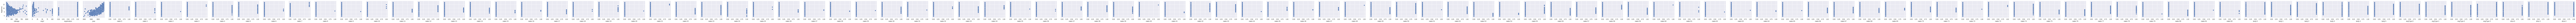

In [11]:
sns.pairplot(df, x_vars=[x for x in df if x not in ["log(price)", "price"]], y_vars=["log(price)"])

## 2.3 If appropriate, create any polynomial features. 

In [12]:
model = LinearRegression()
model.fit(df[[x for x in df if x not in ["price", "log(price)"]]].values,df["log(price)"].values.reshape(-1,1))
rmse_base = np.sqrt(mean_squared_error(df["log(price)"].values.reshape(-1,1), model.predict(df[[x for x in df if x not in ["price", "log(price)"]]].values)))
max_poly = {}
for x in df:
  if x not in ["price", "log(price)"] and ":" not in x:
    rmse = rmse_base
    dn = df.copy()
    for i in range(2,10+1):
      dn["{}^{}".format(x,i)] = dn["{}".format(x)] ** i
      model.fit(dn[[x for x in dn if x not in ["price", "log(price)"]]].values,dn["log(price)"].values.reshape(-1,1))
      rmse_n = np.sqrt(mean_squared_error(dn["log(price)"].values.reshape(-1,1), model.predict(dn[[x for x in dn if x not in ["price", "log(price)"]]].values)))
      if rmse_n < rmse:
        rmse = rmse_n
        if x not in max_poly:
          max_poly[x] = [rmse]
        else:
          max_poly[x].append(rmse)
      else:
        break
for k in max_poly:
  num = len(max_poly[k])
  print(k, num)
  for i in range(2,2+num):
    df["{}^{}".format(k,i)] = df["{}".format(k)] ** i

mileage 3
engV 5
year 2


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [13]:
model.fit(df[[x for x in df if x not in ["price", "log(price)"]]].values,df["log(price)"].values.reshape(-1,1))
y_pred = model.predict(df[[x for x in df if x not in ["price", "log(price)"]]].values)
rmse = np.sqrt(mean_squared_error(df["log(price)"].values.reshape(-1,1), y_pred))
r2 = r2_score(df["log(price)"].values.reshape(-1,1), y_pred)

f_string = "{:30s}{:16.8f}"
print(f_string.format("RMSE:", rmse))
print(f_string.format("R^2:", r2))
print()
print(f_string.format("Intercept:", float(model.intercept_)))
for i in range(len(model.coef_[0])):
  print(f_string.format("Coefficient({}):".format([x for x in df if x not in ["price", "log(price)"]][i]), float(model.coef_[0][i])))

RMSE:                               0.28439333
R^2:                                0.91256303

Intercept:                      48246.67889413
Coefficient(mileage):              -0.00239593
Coefficient(engV):                  0.56416683
Coefficient(registration):          0.81389114
Coefficient(year):                -69.29765685
Coefficient(make:0):                0.01018049
Coefficient(make:1):                0.22380044
Coefficient(make:2):                0.07982123
Coefficient(make:3):                1.38328732
Coefficient(make:4):                0.38200508
Coefficient(make:5):                0.51740116
Coefficient(make:6):               -0.51209217
Coefficient(make:7):                1.36583376
Coefficient(make:8):               -1.11797010
Coefficient(make:9):                0.01416181
Coefficient(make:10):               0.45457571
Coefficient(make:11):              -0.73239823
Coefficient(make:12):              -0.14583459
Coefficient(make:13):               0.14876616
Coefficient(

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

With every increase in the vehicle year by one, the log of the price of the vehicle decreases by  a value of 69 if just accounting for the nonpolynomial year feature. However, with the polynomial features for year, the gradient of the log of price with respect to year is:

$\frac{\partial}{\partial year} \log(price) = -69.29765685 + 0.03308193 * year - 0.00000525 * year^2 $

To change to non-log price, the gradient of price with respect to year is:

$\frac{\partial}{\partial year} price = \exp(model_{\log(price)}) * (-69.29765685 + 0.03308193 * year - 0.00000525 * year^2)  $

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize a cost function to a local minima, which is essentially a measure of how different the predictions from a model are from the actual values. An example of a cost function is the sum of square error (SSE), which sums the squared difference between the prediction and actual. It accomplishes this by finding the gradient of error for each coefficient, and moving the value of the coefficient in the negative direction of the gradient over a number of iterations. As the gradient decreases, the amount the coefficients are moved by decrease until the change in the error is effectively 0.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate is a scalar that is multiplied by the gradient of the error of the coefficient. It is represented by an $\alpha$, and generally has a value of 0.01 to 0.1. However, the learning rate can also change with the increase in the iteration number. This allows for more values to be covered initially while getting closer to the local minima.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [14]:
X = df[[x for x in df if x not in ["price", "log(price)"]]]
y = df["log(price)"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.206e+05
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:57:44   Log-Likelihood:                -1377.9
No. Observations:                8495   AIC:                             2968.
Df Residuals:                    8389   BIC:                             3715.
Df Model:                         105                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0047      0.000      9.666   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [17]:
def getVIF(v):
  return v[1]

def calcVIF(Xi):
  vif_l = []
  for index in range(Xi.shape[1]):
    vif = variance_inflation_factor(Xi.values, index)
    vif_l.append((list(Xi)[index], vif))
  return vif_l

vif_l = []
for index in range(X.shape[1]):
  vif = variance_inflation_factor(X.values, index)
  print("{:30s}\t{: 16.8f}".format(list(X)[index], vif))
print("Most terms have multicollinearity problems (VIF > 10). Following attempts to fix this.")
# print()
# print()
# X2 = X.copy()
# while True:
#   vif_l = calcVIF(X2)
#   ind = vif_l.index(max(vif_l, key=getVIF))
#   print(X2.shape[1], vif_l[ind][1])
#   if vif_l[ind][1] < 10.0:
#     break
#   else:
#     X2 = X2.drop(columns=[vif_l[ind][0]])
# vif_l = []
# for index in range(X2.shape[1]):
#   vif = variance_inflation_factor(X2.values, index)
#   print("{:30s}\t{: 16.8f}".format(list(X2)[index], vif))
# print()
# print()
# model = sm.OLS(y, X2).fit(cov_type='HC3')
# predictions = model.predict(X2) 
# print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const                         	      0.00000000
mileage                       	     46.94460635
engV                          	    747.80806485
registration                  	      1.21452794
year                          	 16114295.67650952
make:0                        	 14547374.62107405
make:1                        	 2990969.24417903
make:2                        	  67472.66469764
make:3                        	 12187185.45668070
make:4                        	 54092937.12151954
make:5                        	 32515368.51351833
make:6                        	 143397007.67999986
make:7                        	 4638125.14962849
make:8                        	 3538768.04227650
make:9                        	 780633.21701493
make:10                       	 476183.28079414
make:11                       	 24922632.54282198
make:12                       	 24838737.03930230
make:13                       	 18368367.56946197
make:14                       	 18388533.86285680
make:15         